In [3168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

### Import training data

In [3169]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Description of the data:

In [3170]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Information about the data:

In [3171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Duplicate checking:

In [3172]:
df.duplicated().sum()

0

#### Null values checking:

In [ ]:
df.isna().sum()

#### Delete all unnecessary data:

In [3174]:
df2 = df.drop(['Cabin','Name','Ticket','PassengerId'], 1)
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Delete all null values:

In [3176]:
df2 = df2.dropna()
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


#### Replace Sex variable with numbers:

In [3177]:
df2['Sex'] = df2.Sex.replace({'male':1, 'female':0})
df2

<ipython-input-3177-d40389a425f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sex'] = df2.Sex.replace({'male':1, 'female':0})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


#### Replace Embarked variable with numbers:

In [3178]:
df2['Embarked'] = df2.Embarked.replace({'C':1, 'Q':2, 'S':3})
df2

<ipython-input-3178-5529d69f0402>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Embarked'] = df2.Embarked.replace({'C':1, 'Q':2, 'S':3})


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,2
886,0,2,1,27.0,0,0,13.0000,3
887,1,1,0,19.0,0,0,30.0000,3
889,1,1,1,26.0,0,0,30.0000,1


#### Check the correlation between the different variables:

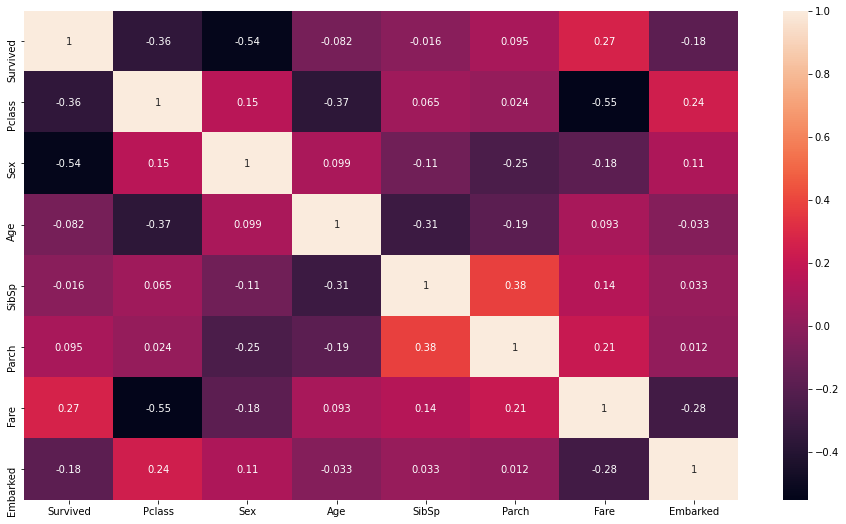

In [3179]:
plt.figure(figsize=(16,9))

sns.heatmap(df2.corr(), annot=True)

plt.show()

In [3192]:
X3 = df2

In [3193]:
X3.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,0.636236,29.642093,0.514045,0.432584,34.567251,2.595506
std,0.491139,0.836854,0.481420,14.492933,0.930692,0.854181,52.938648,0.779038
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,20.000000,0.000000,0.000000,8.050000,3.000000
50%,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.645850,3.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200,3.000000


#### Split the dataset in training and target values:

In [3195]:
X4 = X3.drop(['Survived', 'Age', 'SibSp', 'Parch', 'Embarked'], axis=1)
y = X3['Survived']

#### Scale the data:

In [3196]:
scaler = StandardScaler()
z = scaler.fit_transform(X4)

data = pd.DataFrame(z, columns=X4.columns)
data

,Pclass,Sex,Fare
0,0.908600,0.756138,-0.516380
1,-1.482983,-1.322511,0.694046
2,0.908600,-1.322511,-0.503620
3,-1.482983,-1.322511,0.350326
4,0.908600,0.756138,-0.501257
...,...,...,...
707,0.908600,-1.322511,-0.102875
708,-0.287191,0.756138,-0.407687
709,-1.482983,-1.322511,-0.086335
710,-1.482983,0.756138,-0.086335


#### Split the data for training and test values:

In [3314]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3)

#### Fit the data with the Logistic Regression algorithme: 

In [3315]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

LogisticRegression()

#### Predict the target with Logistic regression algorithme:

In [3316]:
y_train_pred = logReg.predict(X_train)

#### Confusion Matrix:

In [3317]:
print(confusion_matrix(y_train, y_train_pred))

[[244  43]
 [ 67 144]]


#### Classification Report:

In [3318]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       287
           1       0.77      0.68      0.72       211

    accuracy                           0.78       498
   macro avg       0.78      0.77      0.77       498
weighted avg       0.78      0.78      0.78       498



In [3319]:
y_pred = logReg.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [3320]:
print(confusion_matrix(y_test, y_pred))

[[113  24]
 [ 24  53]]


In [3321]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       137
           1       0.69      0.69      0.69        77

    accuracy                           0.78       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.78      0.78      0.78       214



#### Find the best numbers of neighbors for the KNN algorithme:

In [3322]:
error = []

for i in range(1, 40):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train, y_train)
    pred_i = Knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

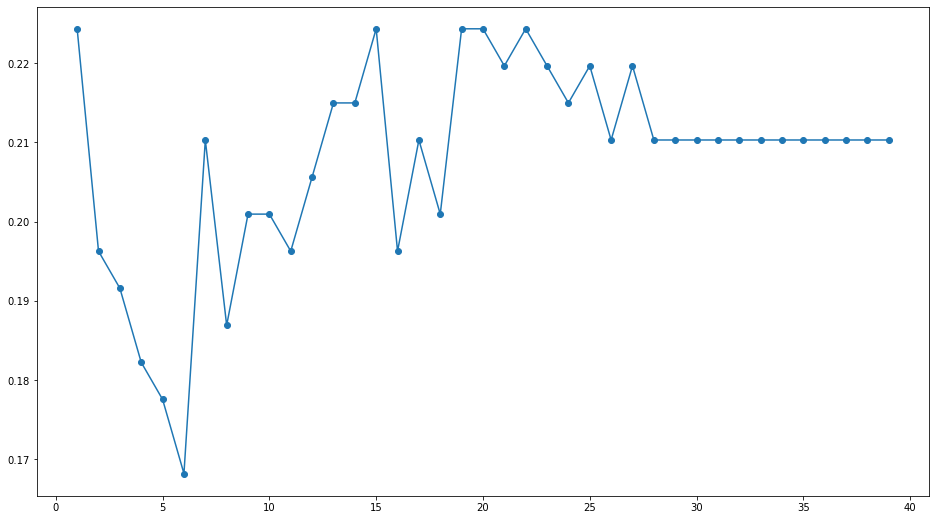

In [3323]:
plt.figure(figsize=(16,9))

plt.plot(range(1,40), error, marker='o')

plt.show()

#### Fit the data with the KNN algorithme:

In [3325]:
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

#### Predict the data with the KNN algorithme:

In [3326]:
pred = classifier.predict(X_train)

#### Confusion Matrix

In [3327]:
print(confusion_matrix(y_train, pred))

[[274  13]
 [ 81 130]]


#### Classification Report

In [3328]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       287
           1       0.91      0.62      0.73       211

    accuracy                           0.81       498
   macro avg       0.84      0.79      0.79       498
weighted avg       0.83      0.81      0.80       498



In [3329]:
pred2 = classifier.predict(X_test)

In [3330]:
print(confusion_matrix(y_test, pred2))

[[128   9]
 [ 27  50]]


In [3331]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       137
           1       0.85      0.65      0.74        77

    accuracy                           0.83       214
   macro avg       0.84      0.79      0.81       214
weighted avg       0.83      0.83      0.83       214



### Analyse predictive 

In [3353]:
data2 = pd.read_csv('test.csv')
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3354]:
data2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3355]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [3356]:
data3 = data2.drop(['Cabin','Name', 'Ticket', 'PassengerId','Age', 'SibSp', 'Parch', 'Embarked'], 1)
data3

,Pclass,Sex,Fare
0,3,male,7.8292
1,3,female,7.0000
2,2,male,9.6875
3,3,male,8.6625
4,3,female,12.2875
...,...,...,...
413,3,male,8.0500
414,1,female,108.9000
415,3,male,7.2500
416,3,male,8.0500


In [3357]:
data3['Sex'] = data3.Sex.replace({'male':1, 'female':0})
data3

,Pclass,Sex,Fare
0,3,1,7.8292
1,3,0,7.0000
2,2,1,9.6875
3,3,1,8.6625
4,3,0,12.2875
...,...,...,...
413,3,1,8.0500
414,1,0,108.9000
415,3,1,7.2500
416,3,1,8.0500


In [3359]:
data3.isna().sum()

Pclass    0
Sex       0
Fare      1
dtype: int64

In [3360]:
data3 = data3.fillna(data3.mean())
data3

,Pclass,Sex,Fare
0,3,1,7.8292
1,3,0,7.0000
2,2,1,9.6875
3,3,1,8.6625
4,3,0,12.2875
...,...,...,...
413,3,1,8.0500
414,1,0,108.9000
415,3,1,7.2500
416,3,1,8.0500


In [3361]:
final = data2[['PassengerId']]
final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [3362]:
z = scaler.transform(data3)
z = pd.DataFrame(z, columns=data3.columns)
z

,Pclass,Sex,Fare
0,0.908600,0.756138,-0.505431
1,0.908600,-1.322511,-0.521106
2,-0.287191,0.756138,-0.470304
3,0.908600,0.756138,-0.489679
4,0.908600,-1.322511,-0.421156
...,...,...,...
413,0.908600,0.756138,-0.501257
414,-1.482983,-1.322511,1.405117
415,0.908600,0.756138,-0.516380
416,0.908600,0.756138,-0.501257


In [3365]:
y_pred2 = logReg.predict(z)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [3366]:
knn_pred = classifier.predict(z)
knn_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [3367]:
final['Survived'] = knn_pred
final = final.set_index('PassengerId')
final

<ipython-input-3367-8b443735392b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Survived'] = knn_pred


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


#### Export the file needed for the competition:

In [3368]:
final.to_csv('titanic2.csv')